In [19]:
image_path = r"1.weBP"

display(HTML(f'<div style="text-align: center;margin-top:20px"><img src="{image_path}" style="max-width: 100%; height: 500px;" /></div>'))


### **Automated Gender Classification Using Facial Recognition and Advanced Deep Learning Techniques**

### **Data Preprocessing**
   - Image Augmentation For Training
   - Image Augmentation For Testing
### **Bulinding CNN Model**
   - Conv2 layer
   - MaxPooling
   - Flatten
   - Full Contection
### 🧠 CNN Model Architecture  


```mermaid
graph TD
    A[Input 64x64x3] --> B[Conv2D 32@3x3]
    B --> C[ReLU]
    C --> D[MaxPooling 2x2]
    D --> E[Conv2D 64@3x3]
    E --> F[ReLU]
    F --> G[MaxPooling 2x2]
    G --> H[Flatten]
    H --> I[Dense 128]
    I --> J[ReLU]
    J --> K[Dense 2]
    K --> L[sigmoid]


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, HTML



In [9]:
Aug_train=ImageDataGenerator(rescale=1./255,rotation_range=20,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [10]:
df_train=Aug_train.flow_from_directory('Training',target_size=(64,64),batch_size = 32,class_mode='binary')

Found 47009 images belonging to 2 classes.


In [11]:
AugTest=ImageDataGenerator(rescale=1./255)

In [12]:
df_test=AugTest.flow_from_directory('Validation',target_size=(64,64),batch_size = 32,class_mode='binary')

Found 11649 images belonging to 2 classes.


## **CNN Model**

In [37]:
CNN=tf.keras.models.Sequential([
     # Convolutional layers
        Conv2D(32, (3, 3), activation="relu", input_shape=[64,64,3]),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),

        # Fully connected layers
        Flatten(),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(1, activation="sigmoid"),  # Output layer
])

In [38]:
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best model weights
)

In [39]:
history = CNN.fit(x=df_train, validation_data=df_test, epochs=9,    callbacks=[early_stopping],verbose=1)



Epoch 1/9
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 205s 139ms/step - accuracy: 0.8079 - loss: 0.4094 - val_accuracy: 0.9240 - val_loss: 0.1939
Epoch 2/9
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 202s 137ms/step - accuracy: 0.9086 - loss: 0.2332 - val_accuracy: 0.9324 - val_loss: 0.1755
Epoch 3/9
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 198s 134ms/step - accuracy: 0.9292 - loss: 0.1884 - val_accuracy: 0.9439 - val_loss: 0.1457
Epoch 4/9
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 199s 135ms/step - accuracy: 0.9330 - loss: 0.1803 - val_accuracy: 0.9520 - val_loss: 0.1295
Epoch 5/9
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 198s 135ms/step - accuracy: 0.9373 - loss: 0.1631 - val_accuracy: 0.9553 - val_loss: 0.1205
Epoch 6/9
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 200s 136ms/step - accuracy: 0.9423 - loss: 0.1521 - val_accuracy: 0.9611 - val_loss: 0.1089
Epoch 7/9
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 209s 142ms/step - accuracy: 0.9459 - loss: 0.1468 - val_accuracy: 0.9581 - val_loss: 0.1176
Epoch 8/9
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 214s 145ms/step - accuracy: 

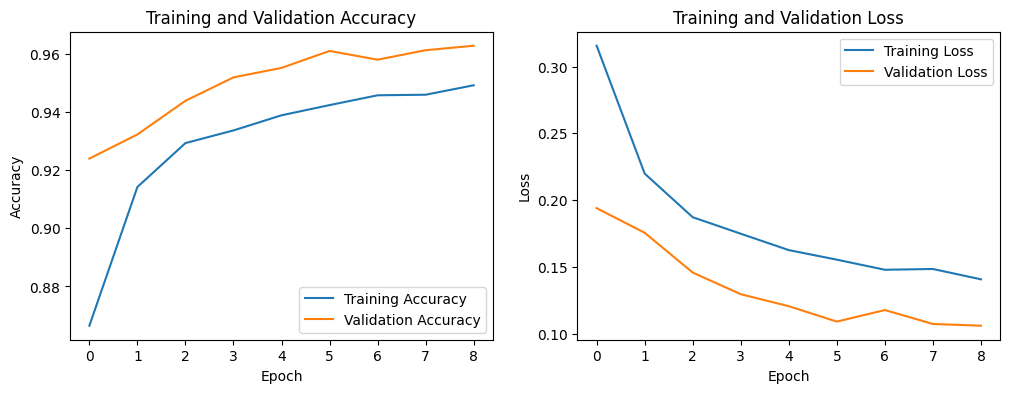

In [40]:
# Plotting the accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [41]:
CNN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,693,509 (36.98 MB)

 Trainable params: 3,231,169 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,462,340 (24.65 MB)

In [42]:
CNN.save('Model_2.h5')

In [15]:
np.save('dataset/class_indices.npy', df_train.class_indices)


In [16]:
import lz4
print("LZ4 is installed successfully!")


LZ4 is installed successfully!
